# Requirements

In [455]:
from pydoc import plain
from xmlrpc.client import DateTime

import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import numpy as np
from PIL.ImageCms import Flags
from plotly.figure_factory.utils import list_of_options
from seaborn import heatmap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [456]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [457]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df = pd.read_csv("./blood_pressure_data.csv")

In [458]:
df.sample(5)

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
3515,106974.0,3/7/1984,170.0,70.0,NaN,108.0,194.0,NORMAL,55.0,113.0,NaN,NaN,0.7,NaN,15.0,19.0,No,140.0
4658,NaN,4/21/1969,NaN,NaN,68.0,98.0,195.0,LOW,NaN,98.0,NaN,NaN,1.2,29.0,39.0,24.0,No,NaN
2852,98095.0,6/20/1969,155.0,55.0,66.0,96.0,223.0,NORMAL,53.0,150.0,NaN,NaN,NaN,25.0,32.0,14.0,No,NaN
7814,108133.0,NaN,170.0,65.0,90.0,108.0,263.0,HiGH,52.0,193.0,NaN,1.0,1.0,29.0,NaN,14.0,No,135.0
3416,940.0,NaN,NaN,75.0,80.0,87.0,NaN,NaN,50.0,NaN,16.1,1.0,NaN,NaN,19.0,NaN,No,NaN


In [459]:
def change(date):
    date=str(date)
    if date== "nan":
        return None
    month,day,year = [int(part) for part in date.split("/")]
    return 2025-year
    

In [460]:
df["age"] = df["age"].apply(lambda x:change(x))

In [461]:
df.sample(5)

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
4183,67298.0,31.0,NaN,80.0,78.0,NaN,220.0,UNK,NaN,124.0,NaN,1.0,NaN,NaN,25.0,22.0,Yes,116.0
8367,NaN,NaN,150.0,NaN,70.0,105.0,221.0,LOW,65.0,138.0,NaN,1.0,0.9,35.0,22.0,NaN,Yes,118.0
6084,141868.0,51.0,155.0,50.0,62.0,NaN,195.0,LOW,NaN,NaN,12.6,3.0,NaN,NaN,18.0,12.0,No,112.0
8144,49695.0,41.0,NaN,75.0,70.0,85.0,NaN,NORMAL,46.0,NaN,16.8,1.0,NaN,36.0,43.0,NaN,No,NaN
6719,139807.0,46.0,155.0,NaN,NaN,95.0,233.0,LOW,92.0,NaN,12.7,1.0,NaN,22.0,16.0,42.0,No,134.0


In [462]:
df = df.drop(columns=["id"],axis=1)

In [463]:
df.sample(5)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
6221,27.0,170.0,65.0,65.0,102.0,153.0,LOW,46.0,94.0,NaN,NaN,1.0,17.0,NaN,27.0,No,116.0
4028,61.0,165.0,65.0,NaN,NaN,188.0,HiGH,NaN,110.0,14.9,1.0,1.2,27.0,22.0,53.0,No,122.0
2234,NaN,155.0,70.0,80.0,91.0,NaN,LOW,NaN,NaN,13.1,NaN,0.7,23.0,28.0,NaN,No,120.0
4571,NaN,NaN,NaN,80.0,NaN,217.0,NaN,40.0,138.0,NaN,1.0,1.1,23.0,26.0,83.0,No,NaN
2203,61.0,160.0,65.0,NaN,98.0,207.0,LOW,76.0,114.0,13.5,NaN,0.7,20.0,17.0,16.0,No,NaN


In [464]:
for cat in df.select_dtypes(include=["object","category"]):
    for num in df.select_dtypes(include=["number"]):
        print(f"{cat} : {num}")
        print(df.groupby(cat)[num].mean())
        print()

triglyceride : age
triglyceride
ABNORMAL    44.963731
HiGH        44.827560
LOW         46.463587
NORMAL      47.547840
UNK         46.572320
Name: age, dtype: float64

triglyceride : height(cm)
triglyceride
ABNORMAL    167.255814
HiGH        166.836493
LOW         161.541618
NORMAL      164.467061
UNK         163.537095
Name: height(cm), dtype: float64

triglyceride : weight(kg)
triglyceride
ABNORMAL    73.651961
HiGH        70.842434
LOW         60.459659
NORMAL      68.283914
UNK         65.552268
Name: weight(kg), dtype: float64

triglyceride : relaxation
triglyceride
ABNORMAL    79.639024
HiGH        77.998500
LOW         74.509021
NORMAL      78.027481
UNK         77.085151
Name: relaxation, dtype: float64

triglyceride : blood sugar
triglyceride
ABNORMAL    104.595122
HiGH         99.952560
LOW          94.790398
NORMAL      100.388889
UNK          98.498994
Name: blood sugar, dtype: float64

triglyceride : Cholesterol
triglyceride
ABNORMAL    208.567839
HiGH        202.003030
L

In [465]:
list1 = list(df.select_dtypes(include=["number"]))
list1


['age',
 'height(cm)',
 'weight(kg)',
 'relaxation',
 'blood sugar',
 'Cholesterol',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'blood pressure']

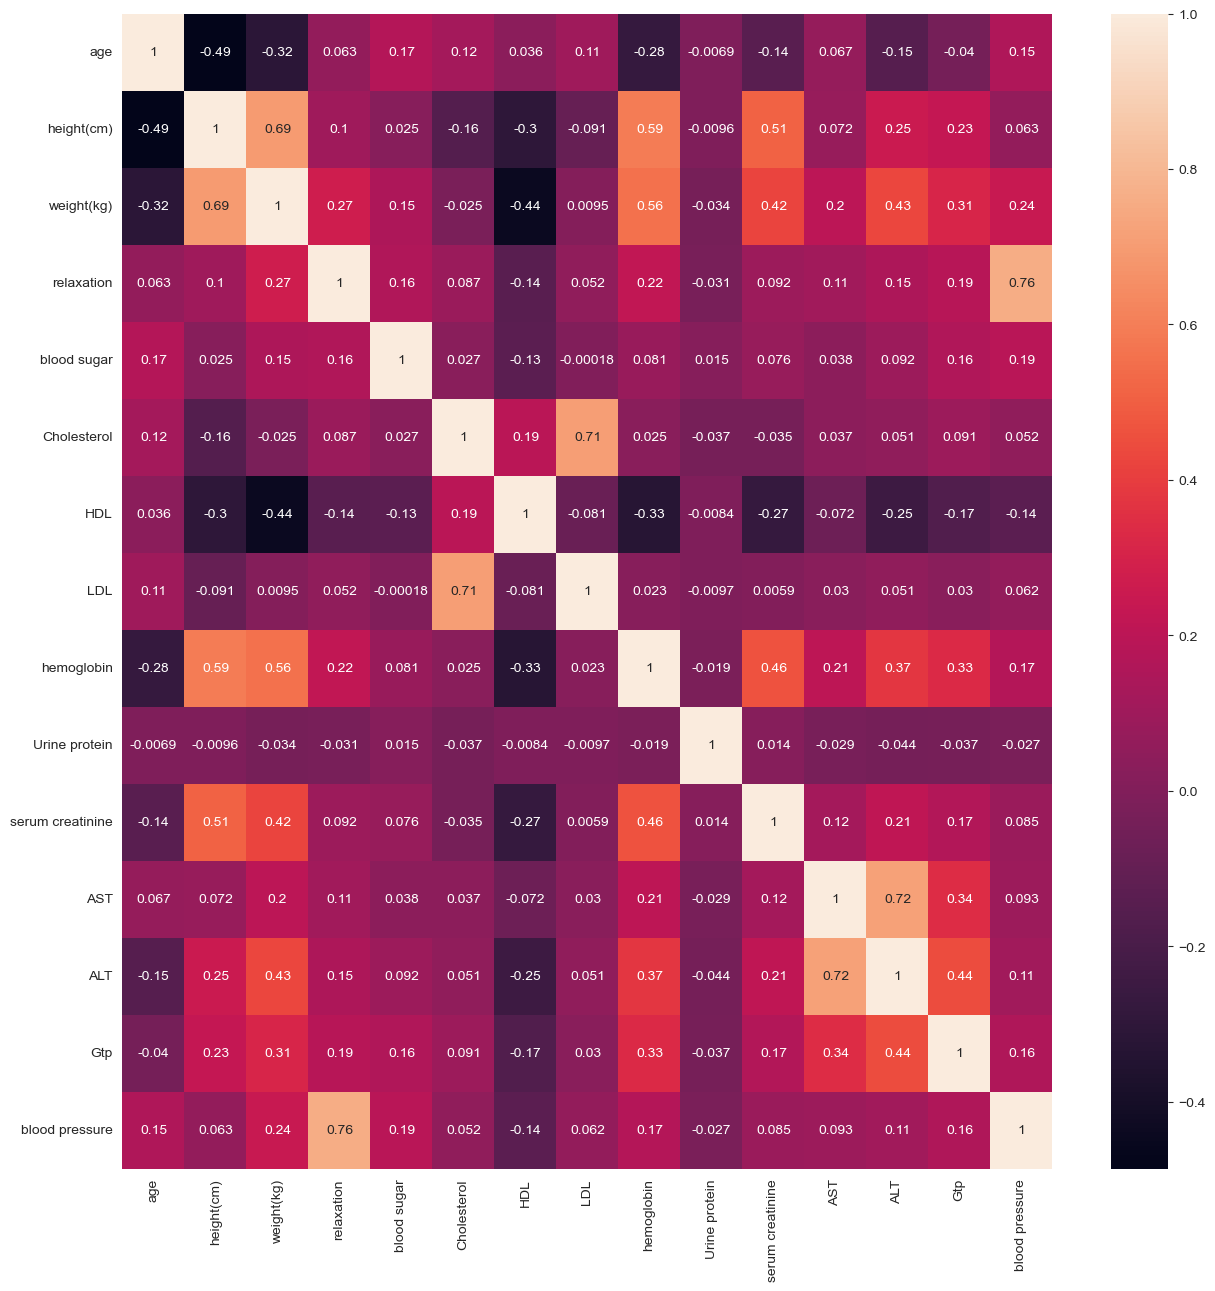

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df[list1].corr(),annot=True)
plt.show()

In [467]:
df.isna().sum()

age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

Explore the dataset using visualizations of your choice.

In [468]:
# sns.pairplot(df)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df.select_dtypes(include=["object","category"]):
    mask = df[col].isnull()
    df[col] = encoder.fit_transform(df[col])
    df.loc[mask,col] = None
    print(col)

triglyceride
dental caries


In [469]:
df.dropna(subset=["blood pressure"],axis=0,inplace=True)

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [470]:
df.sample(5)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
8801,61.0,160.0,50.0,67.0,86.0,170.0,1.0,NaN,90.0,NaN,1.0,0.8,22.0,12.0,26.0,0.0,102.0
3578,31.0,NaN,100.0,80.0,93.0,188.0,1.0,37.0,109.0,14.8,1.0,1.1,45.0,53.0,57.0,0.0,128.0
6903,31.0,170.0,65.0,86.0,105.0,224.0,3.0,59.0,145.0,16.6,NaN,0.9,27.0,NaN,51.0,0.0,126.0
6975,66.0,145.0,60.0,86.0,112.0,NaN,2.0,74.0,141.0,12.9,1.0,0.8,20.0,22.0,24.0,0.0,135.0
6773,NaN,160.0,50.0,60.0,85.0,168.0,2.0,73.0,78.0,NaN,1.0,NaN,35.0,30.0,11.0,0.0,103.0


In [471]:
# Write your code here. Add as many boxes as you need.



## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Figure size 1000x1000 with 0 Axes>

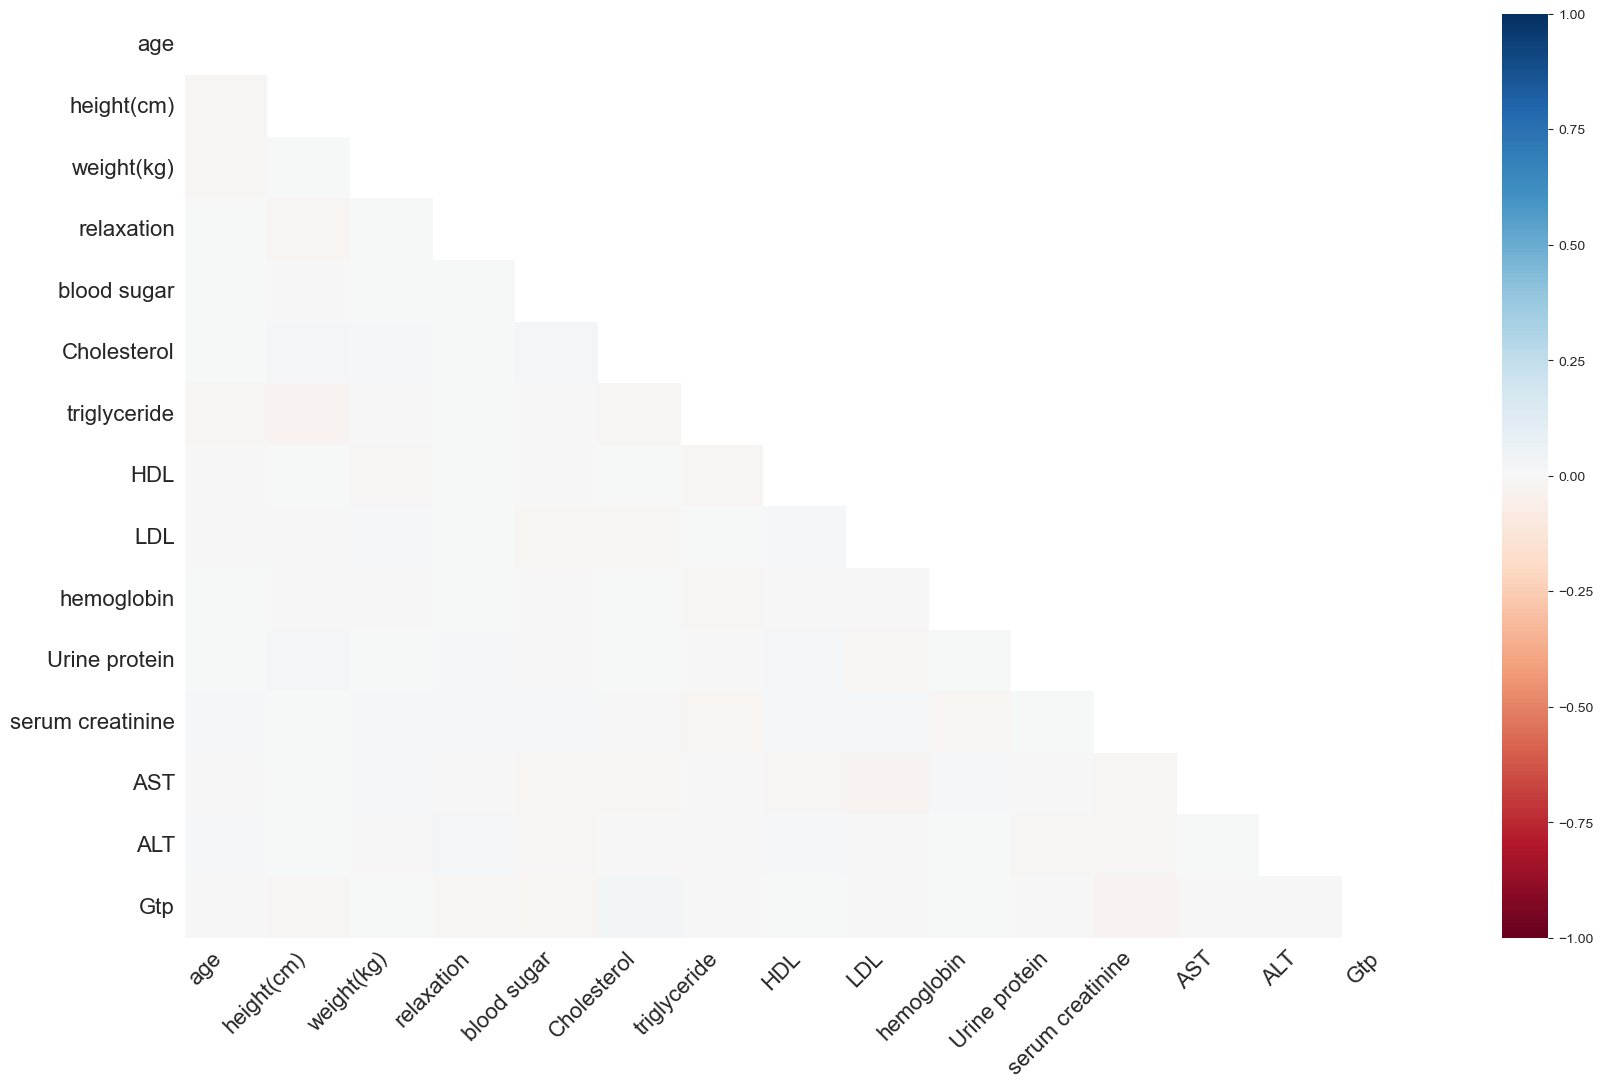

In [472]:
# Write your code here. Add as many boxes as you need.
import missingno as msn
plt.figure(figsize=(10,10))
msno.heatmap(df)
plt.show()

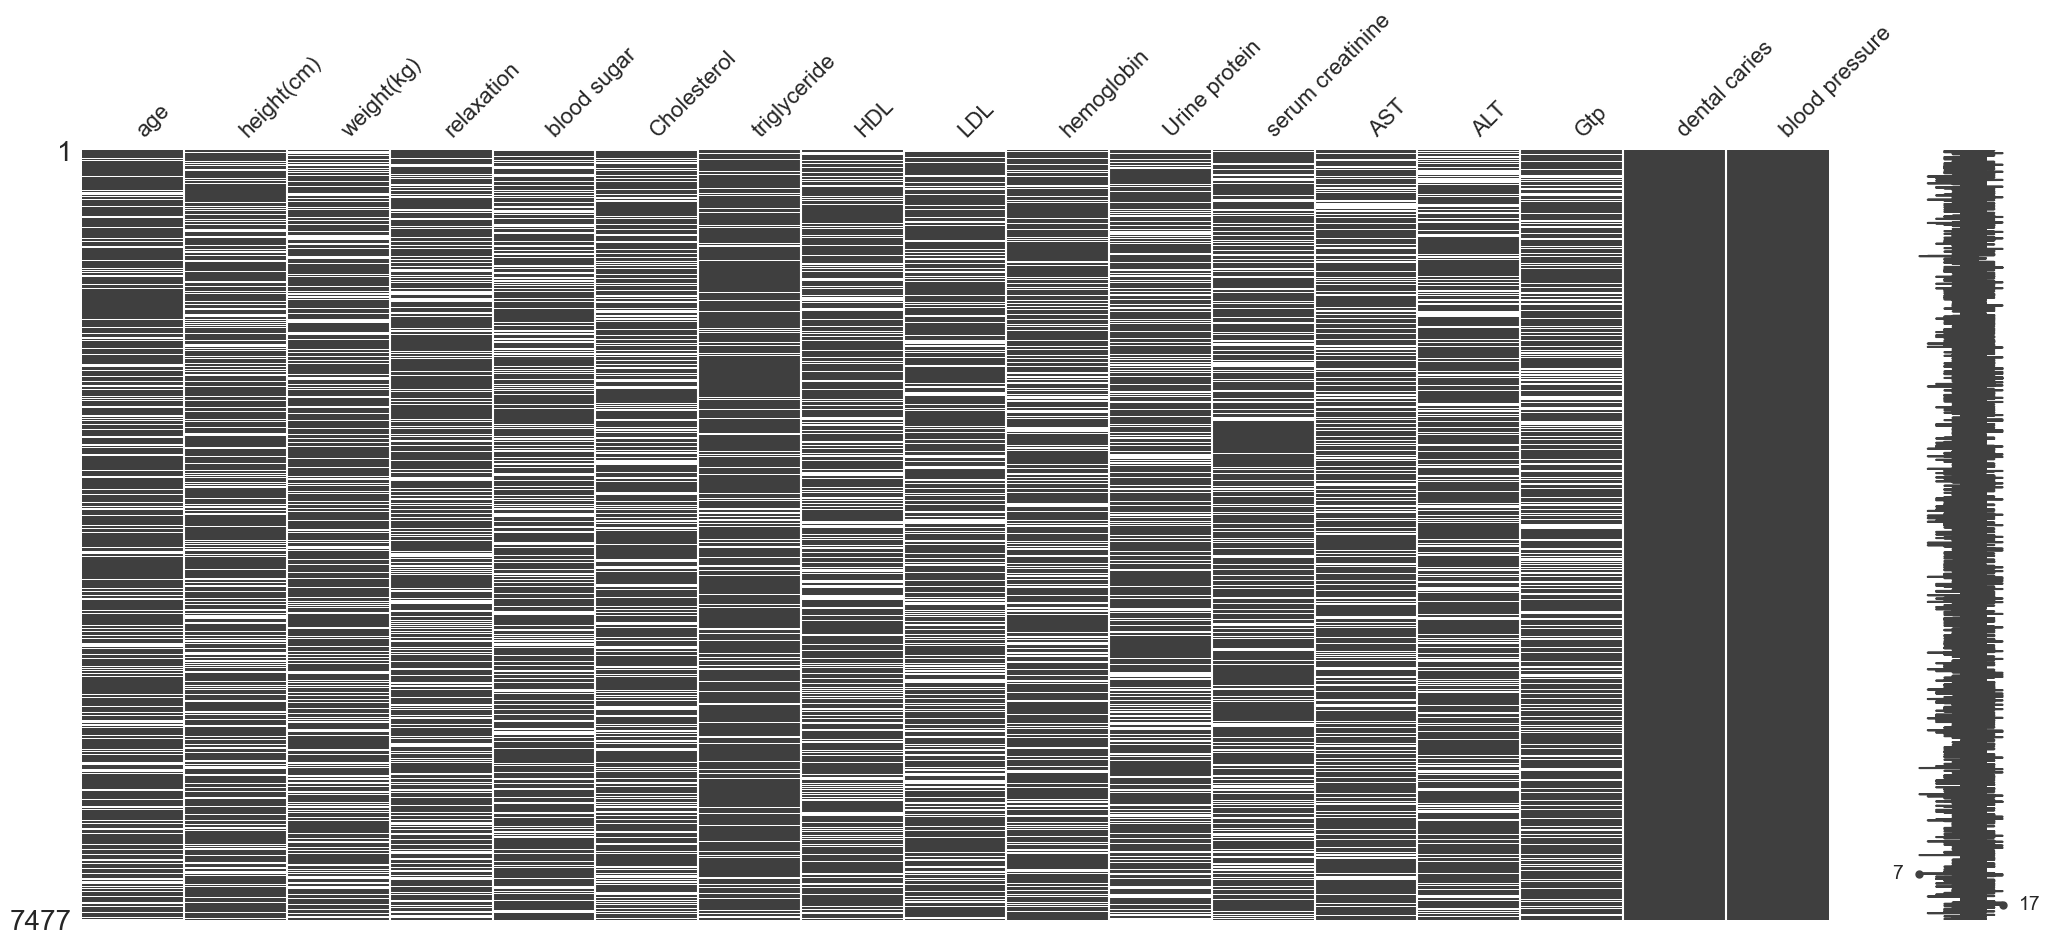

In [473]:

msno.matrix(df)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [474]:
df.isnull().sum()

age                 1982
height(cm)          1967
weight(kg)          1927
relaxation          1910
blood sugar         1947
Cholesterol         1966
triglyceride        1007
HDL                 1962
LDL                 1966
hemoglobin          1961
Urine protein       1901
serum creatinine    1921
AST                 1923
ALT                 1919
Gtp                 1927
dental caries          0
blood pressure         0
dtype: int64

In [475]:
def find_correlation_groups(df, threshold=0.5):
    correlation_dict = {col: [other for other in df.columns if col != other and abs(df[col].corr(df[other])) > threshold] for col in df.columns}
    visited, groups = set(), []

    def dfs(col, group):
        if col not in visited:
            visited.add(col)
            group.add(col)
            for neighbor in correlation_dict[col]:
                dfs(neighbor, group)

    for col in df.columns:
        if col not in visited:
            group = set()
            dfs(col, group)
            groups.append(group)
    return groups

In [476]:
groups = find_correlation_groups(df)

In [477]:
list_simple = []
for i in df.columns:
    hasCorrelation = False
    for j in df.columns:
        if i==j: continue
        corr = df[i].corr(df[j])
        if corr>0.4 or corr<-0.4:
            hasCorrelation =True 
            continue
    if not hasCorrelation:
        list_simple.append(i)
list_simple


['blood sugar', 'triglyceride', 'Urine protein', 'dental caries']

In [478]:

from sklearn.impute import SimpleImputer

for att in list_simple:
    median_imputer = SimpleImputer(strategy = 'median')
    df[att] = median_imputer.fit_transform(df[att].values.reshape(-1,1))

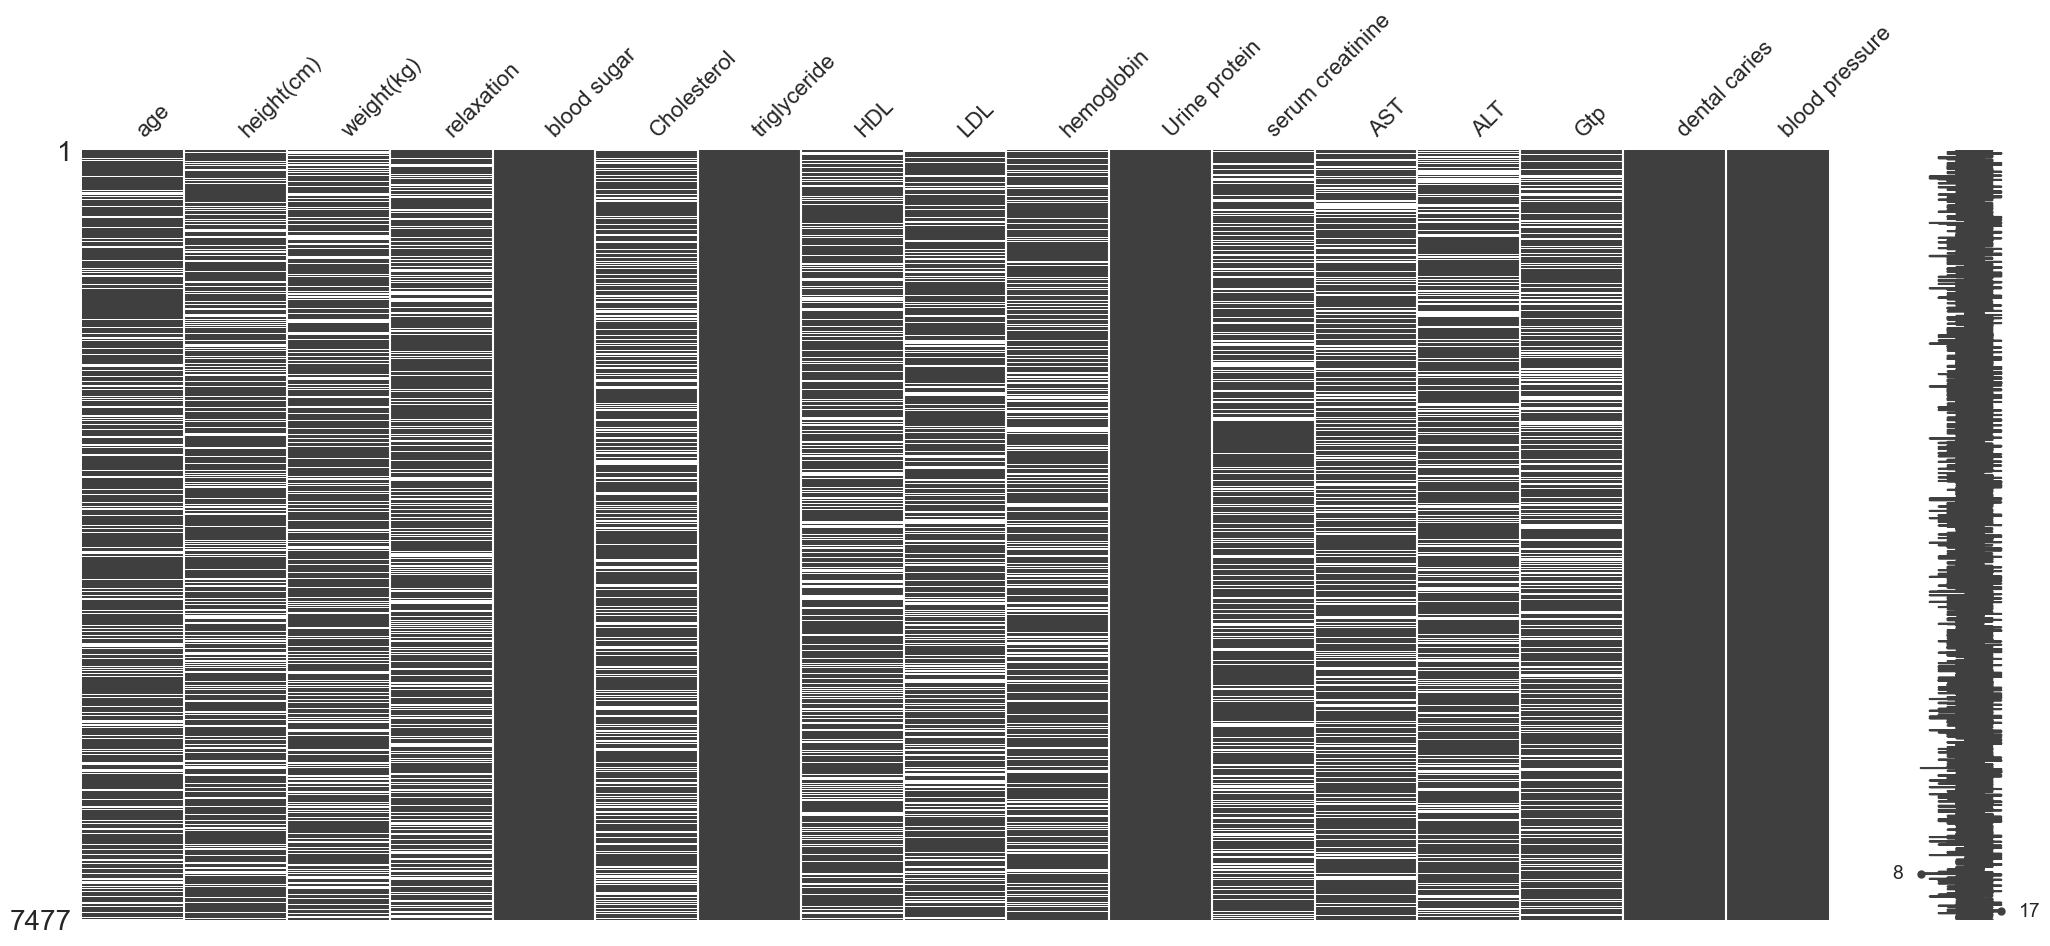

In [479]:
msno.matrix(df)
plt.show()

In [480]:
# related_atts = list(df.columns)
# for i in list_simple:
#     related_atts.remove(i)
# related_atts

In [481]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for group in groups:
    scaled_data = scaler.fit_transform(df[list(group)])
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_data = knn_imputer.fit_transform(scaled_data)
    imputed_data = scaler.inverse_transform(imputed_data)
    df[list(group)] = imputed_data

In [482]:
# imputed_data = scaler.inverse_transform(imputed_data)


In [483]:
# df[related_atts] = imputed_data

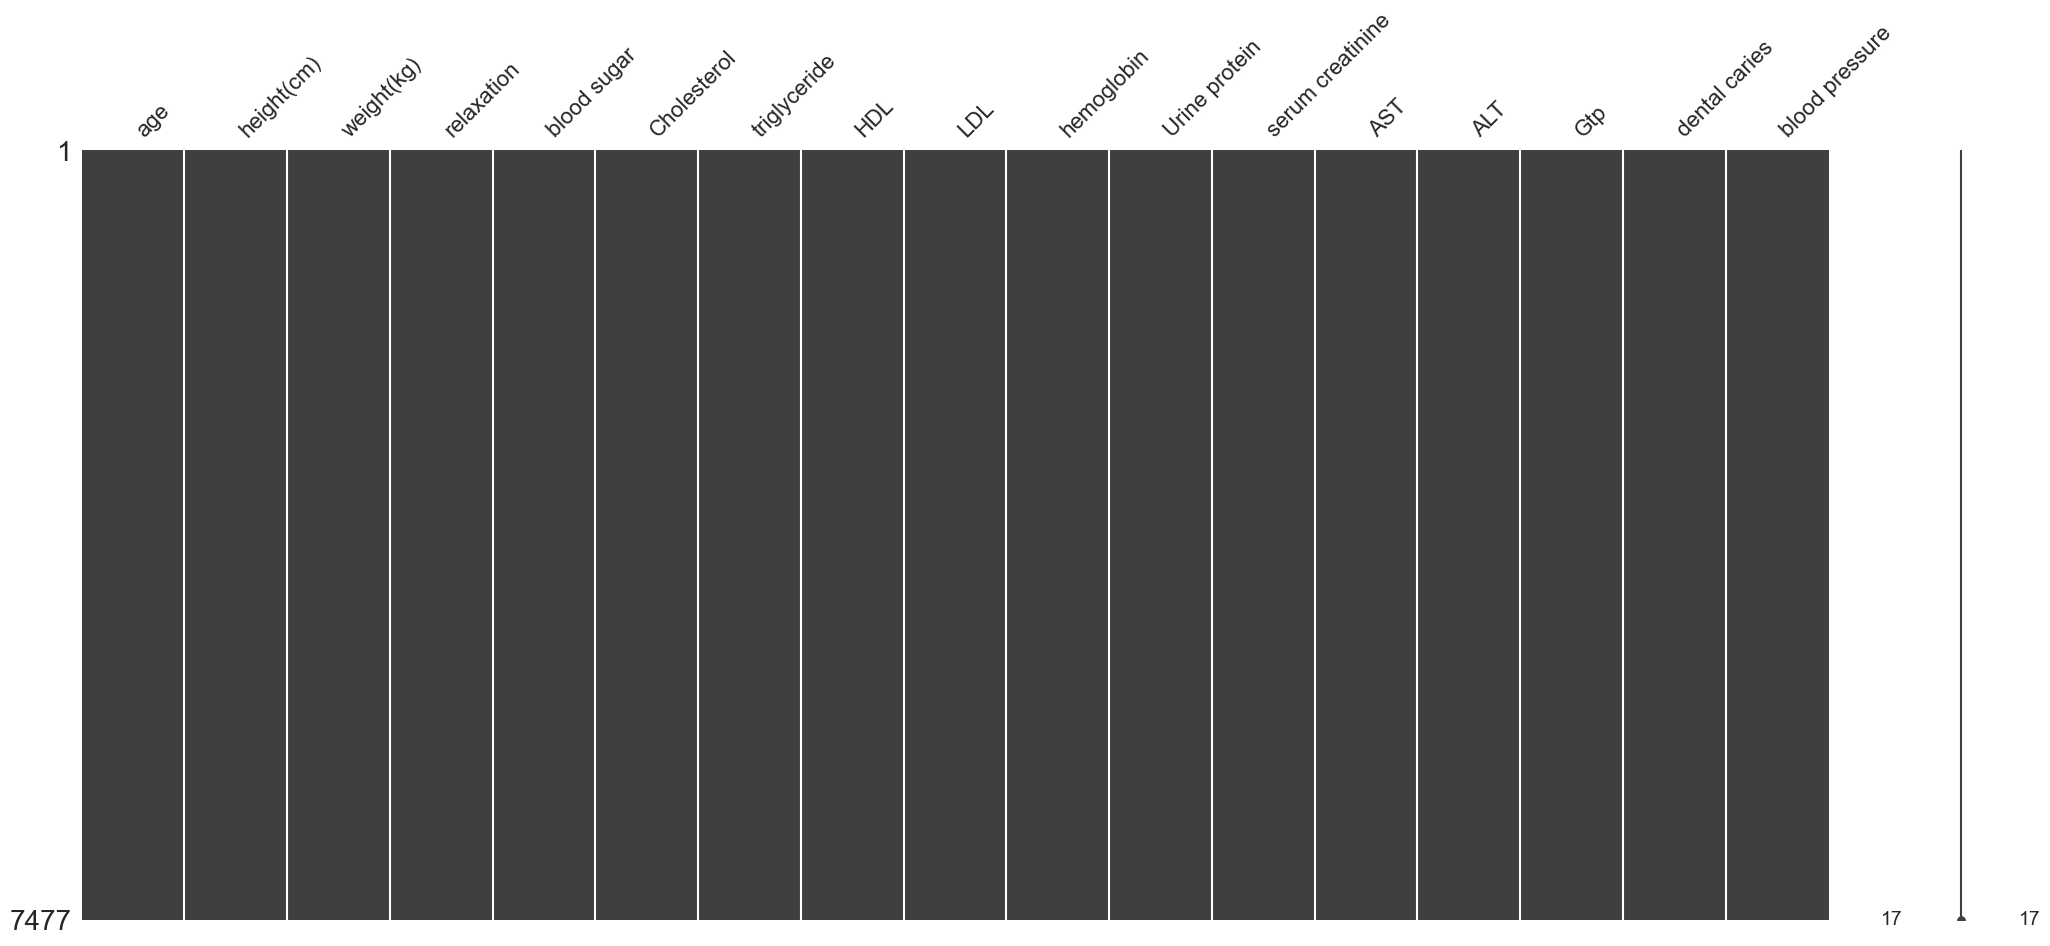

In [484]:
msno.matrix(df)
plt.show()

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [485]:
df.sample(5)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
9120,41.0,170.0,85.0,68.0,91.0,196.578661,2.0,39.00000,115.467429,15.60,1.0,1.00,24.0,32.0,37.000000,0.0,119.0
1478,41.0,165.0,75.0,79.0,95.0,215.000000,0.0,44.00000,106.000000,16.80,1.0,1.10,33.6,39.0,33.000000,0.0,120.0
3081,67.0,140.0,60.0,89.8,97.0,210.000000,2.0,67.00000,130.400000,14.70,1.0,0.90,15.0,18.0,21.000000,0.0,142.0
1880,42.0,163.0,80.0,79.0,95.0,183.000000,1.0,57.31369,102.000000,13.40,1.0,0.88,31.0,23.0,39.000000,0.0,131.0
3196,21.0,170.0,72.0,70.0,99.0,199.000000,2.0,59.00000,110.000000,15.26,1.0,1.10,33.2,34.0,32.488829,0.0,120.0


In [486]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
Y = df["blood pressure"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, shuffle=True)

In [487]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [488]:
param_grid = {
    'learning_rate' :[0.7,1.0,1.4],
    'subsample': [0.6,0.8,0.9],
    'colsample_bynode' :[0.6,0.8,0.9]
}

# learning_rate: float = 1.0,
#         subsample: float = 0.8,
#         colsample_bynode: float = 0.8,

In [489]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5)


In [490]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf,n_jobs=-1)
cv.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.6, 0.8, 0.9],
                         'learning_rate': [0.7, 1.0, 1.4],
                         'subsample': [0.6, 0.8, 0.9]})

In [491]:
model = cv.best_estimator_


In [492]:
len(df)

7477

In [493]:
Y_pred = model.predict(X_test)
Y_pred

array([136.5631 , 119.20841, 134.92825, ..., 144.95479, 122.34998,
       124.32032], dtype=float32)

In [494]:
Y_test

377     134.0
2831    116.0
6776    128.0
774     130.0
2955    110.0
        ...  
4321    130.0
505     117.0
5891    135.0
2319    136.0
6088    120.0
Name: blood pressure, Length: 1496, dtype: float64

In [495]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.5076972460215413

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [496]:
# Write your code here. Add as many boxes as you need.
len(df["blood pressure"].unique())

84

In [497]:
from xgboost import XGBRegressor


# Cross-Validation

In [498]:
# Write your code here. Add as many boxes as you need.


Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [499]:
# Write your code here. Add as many boxes as you need.